### 서울시 주유소 가격 정보를 갖고 있는 엑셀 파일 자동 다운로드
- XPATH 사용

In [ ]:
# XPATH 
# - XML Path Language
# - XML 문서의 특정 요소 속성에 접근하기 위한 경로를 지정하는 언어
# - XPATH 식 : 경로식 사용, 수학함수 기타 확장 가능한 표현(기호) 사용

#### Opinet 사이트  
https://www.opinet.co.kr/user/main/mainView.do  
주유소의 가격을 비교하는 사이트  


In [15]:

# 메뉴에서 [싼 주유소 찾기] / [지역별]
# 이 페이지부터 시작
# https://www.opinet.co.kr/searRgSelect.do
# 접속한 지역으로 자동 설정됨
# 지역을 [서울] / [강남구] 로 선택

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [5]:
from urllib.request import urlopen
import pandas as pd
import bs4

In [6]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By # 셀레니움 4.0부터 포함된 객체(모듈)

from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

In [7]:
# (1) webdriver 객체 생성
chrome_options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

In [20]:
# 페이지 접속
url = 'https://www.opinet.co.kr/searRgSelect.do'
driver.get(url)

# 다른 지역에서 접속 시
# 페이지 열리면
# 서울 강남구 선택

In [6]:
# XPATH 값 복사하기
# 개발자도구 열고 [강남구] <select> 태그 선택하고
# 오른쪽 코드에서 선택된 부분 우클릭 / [Copy}] / [Copy Xpath]
# //*[@id="SIGUNGU_NM0"]
Xpath : //*[@id="SIGUNGU_NM0"]
full_Xpath : /html/body/div/div[2]/div/div[2]/div/form/div[1]/div/div[2]/dl/dd[1]/select[2]
# Xpath = full_Xpath 둘은 동일한 경로를 찾아서 간다.

SyntaxError: invalid syntax (3579885701.py, line 5)

In [23]:
# Xpath : //*[@id="SIGUNGU_NM0"]
# Xpath 사용
Xpath = '//*[@id="SIGUNGU_NM0"]'
gu_data = driver.find_element(By.XPATH, Xpath)

# select 내 option 찾기 : //*[@id="SIGUNGU_NM0"]/option
gu_list = gu_data.find_elements(By.TAG_NAME, "option")

In [24]:
# element에서 속성값 추출 
# <select> 태그 내의 <option> 태그의 value 속성
gu_name_list = [opt.get_attribute("value") for opt in gu_list]
gu_name_list.remove("")
gu_name_list

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [25]:
# 선택자로 선택
# 기능 수행 : 다음 페이지로 전환해서 페이지 내의 데이터 추출
# 기능 수행 메소드 2가지 방법
# (1) send_keys()
gu_data.send_keys(gu_name_list[3])

# (2) click()
# //*[@id="templ_list0"]/div[7]/div/a
Xpath_btn = '//*[@id="templ_list0"]/div[7]/div/a/span'
btn = driver.find_element(By.XPATH, Xpath_btn).click()
btn

In [ ]:
# 엑셀 파일  자동 저장
# 왼쪽 주유 가격 맨 아래에 [엑셀저장] 버튼을 자동 실행시켜서
# 모든 구의  주유  정보를 포함하는 엑셀 파일을 자동으로 다운로드

In [17]:
# 테스트 : 1개 파일 다운로드 되는지 확인
# [엑셀저장] 버튼의 XPATH 복사해서 사용


In [26]:
driver.close()

### 서울 시 모든 구의 주유가격 정보 파일 자동 다운로드

In [19]:
# (1) webdriver 객체 생성
chrome_options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

In [22]:
# 페이지 접속
url = 'https://www.opinet.co.kr/searRgSelect.do'
driver.get(url)

# 다른 지역에서 접속 시
# 페이지 열리면
# 서울 강남구 선택

In [ ]:
# 진행 상황 표시 (프로그레스 바 출력하) : tqdm 패키지 사용
# !pip install tqdm
Xpath_btn = '//*[@id="templ_list0"]/div[7]/div/a/span'
btn = driver.find_element(By.XPATH, Xpath_btn).click()
btn

In [23]:
from tqdm import tqdm
import time 

In [25]:
driver.close()

#### 휘발유 기준으로 셀프 주유소는 가격이 싼가?
- 이름이 비슷하고 같은 형식의 파일이 여러 개 있을 때, 한번에 읽어오는 방법
- 관련 패키지 : glob()
    - 파일 경로에서 조건에 맞는 파일 이름의 데이터를 수집해서 리스트로 변환
    - 기호를 이용해서 파일 조건 지정 가능
    - ex. 지역_위치별*.xls

In [1]:
# 지정된 폴더에서 특정한 문자열을 포함한 파일들의 파일명을 list로 변환
from glob import glob

In [2]:
fname = glob("C:/Dev/git_ahnlab/a_data_engineer/j_dsde/DE/scrap/crawl_data/주유/지역_위치별*.xls")
len(fname)

25

In [8]:
# excel 파일 읽어오기
# pd.read_excel("파일경로", header = "컬럼명 행번호")
# 읽을 파일의 컬럼명은 3번 행에 있음, index로는 2번
pd.read_excel(fname[0], header=2).head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),HD현대오일뱅크,02-487-2030,Y,-,1679,1529,-
1,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,1885,1685,1535,-
2,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),HD현대오일뱅크,02-441-0536,N,-,1697,1565,-
3,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,Y,1950,1716,1588,1699
4,서울특별시,(주)소모 신월주유소,서울 강동구 양재대로 1323,GS칼텍스,02-6956-6674,Y,1926,1726,1598,1500


In [9]:
# 25개의 excel 파일 읽어서 한개의 df로 변합
# df concat시 집합구조에 모든 df가 저장되어 있으면 효율적인
# df를 list 안에 저장하고 한번에 병합
tmp_raw = []
for name in fname:
    tmp_df = pd.read_excel(name, header=2)
    tmp_raw.append(tmp_df)

In [10]:
len(tmp_raw)
(tmp_raw)

25

[       지역                    상호                            주소        상표  \
 0   서울특별시  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)  HD현대오일뱅크   
 1   서울특별시               방아다리주유소          서울 강동구 동남로 811 (명일동)     SK에너지   
 2   서울특별시                구천면주유소         서울 강동구 구천면로 357 (암사동)  HD현대오일뱅크   
 3   서울특별시        (주)삼표에너지 고덕주유소           서울 강동구 고덕로 39 (암사동)     GS칼텍스   
 4   서울특별시           (주)소모 신월주유소              서울 강동구 양재대로 1323     GS칼텍스   
 5   서울특별시          대성석유(주)길동주유소              서울 강동구 천호대로 1168     GS칼텍스   
 6   서울특별시        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)     GS칼텍스   
 7   서울특별시       (주)퍼스트오일 코알라주유소     서울특별시 강동구  올림픽로 556 (성내동)     S-OIL   
 8   서울특별시      주)지유에너지직영 오렌지주유소          서울 강동구 성안로 102 (성내동)     SK에너지   
 9   서울특별시              sk해뜨는주유소         서울 강동구  상일로 132 (강일동)     SK에너지   
 10  서울특별시           (주)소모 성내주유소         서울 강동구 올림픽로 578 (성내동)     GS칼텍스   
 11  서울특별시               천호현대주유소           서울 강동구 천중로 67 (천호동)  HD현대오일뱅크   
 12  서울특별시  

In [11]:
station_raw = pd.concat(tmp_raw)
station_raw.shape
station_raw

(421, 10)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),HD현대오일뱅크,02-487-2030,Y,-,1679,1529,-
1,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,1885,1685,1535,-
2,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),HD현대오일뱅크,02-441-0536,N,-,1697,1565,-
3,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,Y,1950,1716,1588,1699
4,서울특별시,(주)소모 신월주유소,서울 강동구 양재대로 1323,GS칼텍스,02-6956-6674,Y,1926,1726,1598,1500
...,...,...,...,...,...,...,...,...,...,...
25,서울특별시,대청주유소,서울 강남구 개포로 654 (일원동),SK에너지,02-445-5500,N,2516,2296,2096,1869
26,서울특별시,(주)소모 쎈트럴주유소,서울 강남구 삼성로 335,GS칼텍스,02-565-0267,N,2518,2318,2118,1550
27,서울특별시,SK논현주유소,서울 강남구 논현로 747 (논현동),SK에너지,02-511-0955,N,2618,2345,2170,1840
28,서울특별시,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,HD현대오일뱅크,02-518-5631,N,2748,2498,2298,-


#### 셀프 주유소와 일반 주유소 가격 비교 시각화 분석
- 데이터 transform

In [12]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 0 to 29
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      421 non-null    object
 1   상호      421 non-null    object
 2   주소      421 non-null    object
 3   상표      421 non-null    object
 4   전화번호    421 non-null    object
 5   셀프여부    421 non-null    object
 6   고급휘발유   421 non-null    object
 7   휘발유     421 non-null    int64 
 8   경유      421 non-null    int64 
 9   실내등유    421 non-null    object
dtypes: int64(2), object(8)
memory usage: 36.2+ KB


In [13]:
# 필요 컬럼 추출
station = pd.DataFrame(
    {
        "주유소":station_raw["상호"], 
        "주소":station_raw["주소"], 
        "가격":station_raw["휘발유"], 
        "셀프":station_raw["셀프여부"], 
        "상표":station_raw["상표"],
    }
)
station.head()

,주유소,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1679,Y,HD현대오일뱅크
1,방아다리주유소,서울 강동구 동남로 811 (명일동),1685,Y,SK에너지
2,구천면주유소,서울 강동구 구천면로 357 (암사동),1697,N,HD현대오일뱅크
3,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1716,Y,GS칼텍스
4,(주)소모 신월주유소,서울 강동구 양재대로 1323,1726,Y,GS칼텍스


In [14]:
station["구"] = [addr.split()[1] for addr in station["주소"]]
station.head()

,주유소,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1679,Y,HD현대오일뱅크,강동구
1,방아다리주유소,서울 강동구 동남로 811 (명일동),1685,Y,SK에너지,강동구
2,구천면주유소,서울 강동구 구천면로 357 (암사동),1697,N,HD현대오일뱅크,강동구
3,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1716,Y,GS칼텍스,강동구
4,(주)소모 신월주유소,서울 강동구 양재대로 1323,1726,Y,GS칼텍스,강동구


In [15]:
station_fin = station[station["가격"] != "-"]
station_fin.reset_index(inplace=True)
station_fin.tail()

,index,주유소,주소,가격,셀프,상표,구
416,25,대청주유소,서울 강남구 개포로 654 (일원동),2296,N,SK에너지,강남구
417,26,(주)소모 쎈트럴주유소,서울 강남구 삼성로 335,2318,N,GS칼텍스,강남구
418,27,SK논현주유소,서울 강남구 논현로 747 (논현동),2345,N,SK에너지,강남구
419,28,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2498,N,HD현대오일뱅크,강남구
420,29,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2590,N,GS칼텍스,강남구


In [16]:
del station_fin["index"]
station_fin.head()

,주유소,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1679,Y,HD현대오일뱅크,강동구
1,방아다리주유소,서울 강동구 동남로 811 (명일동),1685,Y,SK에너지,강동구
2,구천면주유소,서울 강동구 구천면로 357 (암사동),1697,N,HD현대오일뱅크,강동구
3,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1716,Y,GS칼텍스,강동구
4,(주)소모 신월주유소,서울 강동구 양재대로 1323,1726,Y,GS칼텍스,강동구


In [17]:
# 가격 평균 등, 연산을 위해 실수형으로 타입 변경
# station_fin["가격"] = station_fin["가격"].astype(int)
station_fin["가격"] = [float(price) for price in station_fin["가격"]]
station_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   주유소     421 non-null    object 
 1   주소      421 non-null    object 
 2   가격      421 non-null    float64
 3   셀프      421 non-null    object 
 4   상표      421 non-null    object 
 5   구       421 non-null    object 
dtypes: float64(1), object(5)
memory usage: 19.9+ KB


In [18]:
import matplotlib.pyplot as plt # python의 가장 기본 그래프 패키지
import seaborn as sns # matplotlib 위에 추가되어지는 고급 그래프 패키지

# 그래프를 현재 노트 output에 출력 위한 매직 명령어
%matplotlib inline 
import platform # 폰트용(os를 구분하기 위한 모듈)

# matplotlib의 한글 폰트가 없음(한글 깨짐)을 방지
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

<Axes: >

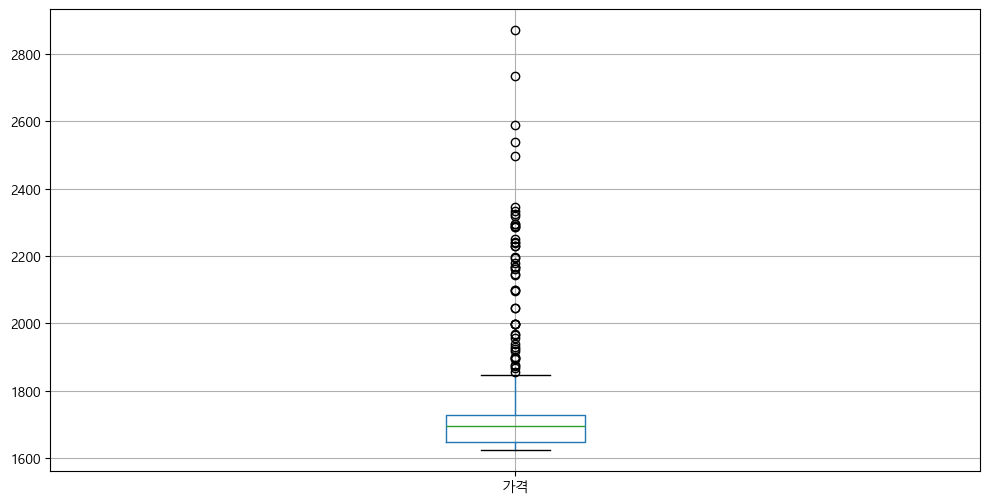

In [19]:
station_fin.boxplot(column="가격", figsize=(12, 6))

<Axes: title={'center': '가격'}, xlabel='셀프'>

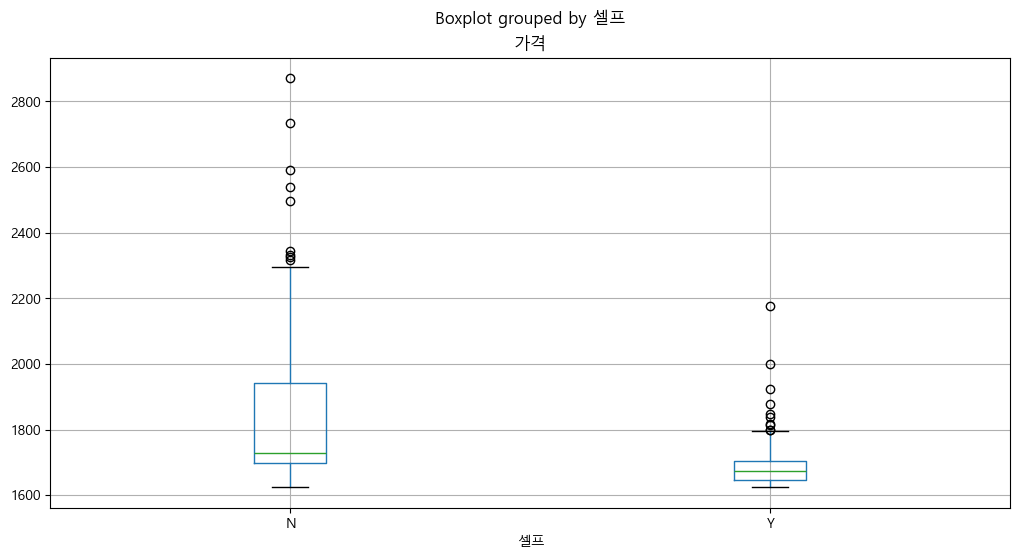

In [20]:
# 셀프여부에 따른 가격 분류
# by = "컬럼"을 기준으로 groupby해서 
station_fin.boxplot(column="가격", by = "셀프",figsize=(12, 6))

In [21]:
# 서울시 전체에서 휘발유가격이 비싼 10개 주유소
station_fin.sort_values("가격", ascending=False)[:10]
station_fin.sort_values("가격", ascending=True)[:10]

,주유소,주소,가격,셀프,상표,구
230,서계주유소,서울 용산구 청파로 367 (청파동),2871.0,N,GS칼텍스,용산구
262,서남주유소,서울 중구 통일로 30,2734.0,N,SK에너지,중구
420,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2590.0,N,GS칼텍스,강남구
261,필동주유소,서울 중구 퇴계로 196,2539.0,N,GS칼텍스,중구
419,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2498.0,N,HD현대오일뱅크,강남구
418,SK논현주유소,서울 강남구 논현로 747 (논현동),2345.0,N,SK에너지,강남구
229,한석주유소,서울 용산구 이촌로 164,2333.0,N,SK에너지,용산구
252,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65,2325.0,N,GS칼텍스,종로구
417,(주)소모 쎈트럴주유소,서울 강남구 삼성로 335,2318.0,N,GS칼텍스,강남구
416,대청주유소,서울 강남구 개포로 654 (일원동),2296.0,N,SK에너지,강남구


,주유소,주소,가격,셀프,상표,구
231,(주)디오티디 은평유니콘주유소,서울 은평구 통일로 1151 (진관동),1624.0,N,HD현대오일뱅크,은평구
232,㈜한화미 구파발주유소,서울 은평구 통일로 1031,1624.0,Y,S-OIL,은평구
183,영등포제일셀프주유소,서울 영등포구 가마산로 379,1625.0,Y,HD현대오일뱅크,영등포구
324,서울중앙고속주유소,서울 광진구 동일로 345 (중곡동),1627.0,Y,SK에너지,광진구
323,(주)창원CW,서울 광진구 광나루로 460 (화양동),1627.0,Y,HD현대오일뱅크,광진구
325,㈜동화오일 대원주유소,서울 광진구 용마산로 122 (중곡동),1627.0,Y,GS칼텍스,광진구
322,(주)자연에너지 중원주유소,서울 광진구 동일로 398 (중곡동),1627.0,Y,HD현대오일뱅크,광진구
161,플라트(주)서호주유소,서울 양천구 남부순환로 317,1628.0,Y,GS칼텍스,양천구
160,현대주유소,서울 양천구 남부순환로 372 (신월동),1628.0,Y,S-OIL,양천구
37,(주)타이거통상 월드컵주유소,서울 마포구 월드컵북로 170 (성산제2동),1629.0,Y,S-OIL,마포구


<Axes: title={'center': '가격'}, xlabel='구'>

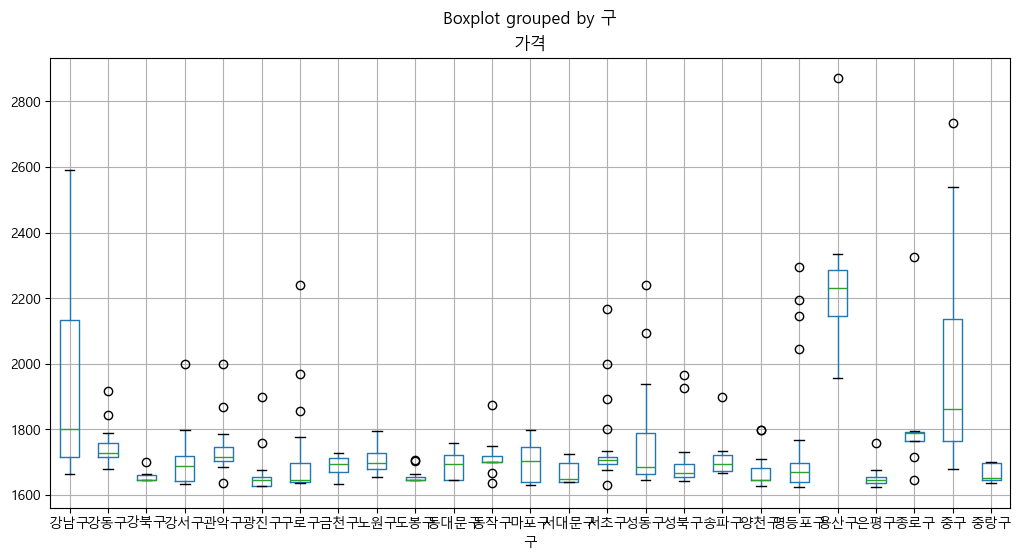

In [22]:
station_fin.boxplot(column="가격", by="구", figsize=(12, 6))

### 구별 휘발유 가격 평균표 생성
- pivot_table(data, index=행index 으로 넣으려는 컬럼, values=[transform 컬럼], aggfunc=사용함수)

In [24]:
import numpy as np

In [29]:
guAvgPrice = pd.pivot_table(station_fin, index=["구"], values=["가격"], aggfunc=np.mean)
guAvgPrice.round(2)

C:\Users\82108\AppData\Local\Temp\ipykernel_33408\3423361135.py:1: FutureWarning: The provided callable <function mean at 0x000002C26D291760> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  guAvgPrice = pd.pivot_table(station_fin, index=["구"], values=["가격"], aggfunc=np.mean)


,가격
구,
강남구,1921.50
강동구,1750.23
강북구,1654.40
강서구,1696.42
관악구,1746.43
광진구,1670.08
구로구,1723.22
금천구,1688.09
노원구,1705.36
